# Лабораторная работа №6

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

*Арешин Станислав Олегович М8О-211M-21*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
warnings.filterwarnings("ignore")

%matplotlib inline

# Подготовка данных

## Регион №1

In [2]:
df1 = pd.read_csv('geo_data_0.csv')
print(df1.shape)
df1.head()

(100000, 5)


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
len(df1[df1['product'] == 0])

1

In [6]:
df1 = df1[df1['product'] != 0].copy()

## Регион №2

In [7]:
df2 = pd.read_csv('geo_data_1.csv')
print(df2.shape)
df2.head()

(100000, 5)


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
len(df2[df2['product'] == 0])

8235

In [11]:
df2 = df2[df2['product'] != 0].copy()

## Регион №3

In [12]:
df3 = pd.read_csv('geo_data_2.csv')
print(df3.shape)
df3.head()

(100000, 5)


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
len(df3[df3['product'] == 0])

1

In [16]:
df3 = df3[df3['product'] != 0].copy()

Пропусков нет, но есть "пустые скважины", где добыча 0. Это странно, я конечно не эксперт в области, но скорее всего это артефакты (например, пропущенные значения, ошибка заполнения), поэтому удалим такие скважины. В первом и третьем регионе их всего по 1 штуке, а вот во втором 8235, при этом всего 100000 данных, так что их удаление сильно не повлияет на качество решения. Типы приведены. Поле id уникальное, поэтому при обучении модели его использовать не будем.

Судя по всему, данные не нормированы, а для линейных моделей важно, чтобы признаки были в одном масштабе, поэтому используем StandardScaler


# Построение моделей

Используем Ridge регрессию с дефолтными параметрами для каждого из трех регионов.

## Модель №1

Строим ридж регрессию для первой скважины. Трейн-тест 75-25.

In [17]:
from sklearn.model_selection import train_test_split

features = list(df1.columns[:-1])
target = 'product'

df1_train, df1_test, y1_train, y1_test = train_test_split(df1[features],
                                                   df1[target],
                                                   test_size=0.25,
                                                   random_state= 42)

df1_train.shape, df1_test.shape

((74999, 4), (25000, 4))

In [18]:
features_new = features[1:]
features_new

['f0', 'f1', 'f2']

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X1_train = scaler.fit_transform(df1_train[features_new])
X1_test = scaler.transform(df1_test[features_new])

In [20]:
from sklearn.linear_model import Ridge

model1 = Ridge(alpha=1)
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

In [24]:
from sklearn.metrics import mean_squared_error

print(f'Средний запас предсказанного сырья по региону для первого региона: {y1_pred.mean()}')
print(f'Медианный запас предсказанного сырья по региону для первого региона: {np.median(y1_pred)}')
print(f'RMSE для первого региона: {np.sqrt(mean_squared_error(y1_test, y1_pred))}')

Средний запас предсказанного сырья по региону для первого региона: 92.70001913894389
Медианный запас предсказанного сырья по региону для первого региона: 92.75918778287956
RMSE для первого региона: 37.87256989830748


In [25]:
df1_test['product'] = y1_test
df1_test['product_pred'] = y1_pred
df1_test.head()

,id,f0,f1,f2,product,product_pred
26002,nO9GI,-0.979293,0.145594,0.967350,55.725794,78.375814
80421,omiUQ,1.584478,-0.314966,10.841077,142.292937,159.732066
19864,1Gm3l,1.422743,-0.534917,3.718798,131.338088,115.231440
81526,yqIGm,0.320959,0.907166,2.518012,126.343691,82.618564
57879,wZUst,2.186908,0.372340,-1.064005,98.399356,73.568837


## Модель №2

In [26]:
features = list(df2.columns[:-1])
target = 'product'

df2_train, df2_test, y2_train, y2_test = train_test_split(df2[features],
                                                   df2[target],
                                                   test_size=0.25,
                                                   random_state= 30)

df2_train.shape, df2_test.shape

((68823, 4), (22942, 4))

In [27]:
features_new = features[1:]
features_new

['f0', 'f1', 'f2']

In [28]:
scaler = StandardScaler()

X2_train = scaler.fit_transform(df2_train[features_new])
X2_test = scaler.transform(df2_test[features_new])

In [29]:
model2 = Ridge(alpha=1)
model2.fit(X2_train, y2_train)
y2_pred = model1.predict(X2_test)

In [30]:
print(f'Средний запас предсказанного сырья по региону для второго региона: {y2_pred.mean()}')
print(f'Медианный запас предсказанного сырья по региону для второго региона: {np.median(y2_pred)}')
print(f'RMSE для второго региона: {np.sqrt(mean_squared_error(y2_test, y2_pred))}')

Средний запас предсказанного сырья по региону для второго региона: 92.48703311302137
Медианный запас предсказанного сырья по региону для второго региона: 92.84514209682453
RMSE для второго региона: 28.675539382068184


In [31]:
df2_test['product'] = y2_test
df2_test['product_pred'] = y2_pred
df2_test.head()

,id,f0,f1,f2,product,product_pred
29392,Neay4,-2.978846,-0.200038,4.993525,137.945408,115.247720
46095,JrYGa,11.353940,-10.218608,4.001521,107.813044,121.218864
6658,MAer1,6.730762,-4.010709,2.003720,53.906522,83.931317
26015,5NaBP,2.786545,-4.333784,1.997386,53.906522,82.858551
40100,5KlYl,11.457534,-5.377683,1.003232,26.953261,74.120846


## Модель №3

In [32]:
features = list(df3.columns[:-1])
target = 'product'

df3_train, df3_test, y3_train, y3_test = train_test_split(df3[features],
                                                   df3[target],
                                                   test_size=0.25,
                                                   random_state= 1)

df3_train.shape, df3_test.shape

((74999, 4), (25000, 4))

In [33]:
features_new = features[1:]
features_new

['f0', 'f1', 'f2']

In [34]:
scaler = StandardScaler()

X3_train = scaler.fit_transform(df3_train[features_new])
X3_test = scaler.transform(df3_test[features_new])

In [35]:
model3 = Ridge(alpha=1)
model3.fit(X3_train, y3_train)
y3_pred = model1.predict(X3_test)

In [36]:
print(f'Средний запас предсказанного сырья по региону для третьего региона: {y3_pred.mean()}')
print(f'Медианный запас предсказанного сырья по региону для третьего региона: {np.median(y3_pred)}')
print(f'RMSE для третьего региона: {np.sqrt(mean_squared_error(y3_test, y3_pred))}')

Средний запас предсказанного сырья по региону для третьего региона: 92.58926312639525
Медианный запас предсказанного сырья по региону для третьего региона: 92.58776600850601
RMSE для третьего региона: 40.832710980160876


In [37]:
df3_test['product'] = y3_test
df3_test['product_pred'] = y3_pred
df3_test.head()

,id,f0,f1,f2,product,product_pred
43659,1aAx3,-3.258196,1.261158,2.711201,79.865840,82.482343
87278,TFdxM,-0.401696,-0.024390,-1.195403,72.411400,69.064370
14317,wV83L,0.101773,-1.699503,1.509664,27.076410,93.668421
93427,XB35W,1.751160,-0.493670,2.777475,29.723451,99.607547
95321,xSvzy,-0.183940,0.814632,12.021626,112.650597,147.637570


 На первый взгляд, хорошие модели получились для всех трех регионов, по RMSE лучшая модель у второго региона, причем с отрывом, это стоит учитывать при принятии решения. Пусть она проигрывает в среднем кол-ве добычи, но проигрыш не так значителен, как ее выигрыш в качестве прогноза

# Расчет прибыли

Считаем в тысячах

In [98]:
#10 млрд. в тысячах
budget = 1000000
# 450 тыс. за единицу (тысяча баррелей)
cost = 450
# сколько скважин хотим выбрать
num_to_select = 200

In [44]:
budget / cost, budget / cost / num_to_select

(2222.222222222222, 11.11111111111111)

Получается, на одну скважину бюджет будет budget / num_to_select

In [76]:
budget / num_to_select

5000.0

Итак, выйти хотя бы в ноль, каждая скважина должна приносить доходность в 5000 тыс., то есть это чуть больше 11 тыс. баррелей со скважины в регионе. В самом регионе в таком случае должно добываться от 2223 тысяч баррелей для выхода хотя бы в ноль. При этом есть доп расходы на транспортировку от скважины и тд, которые мы не учитываем, поэтому для ощутимой прибыли это значение должно быть гораздо выше. Благо, средние значения добычи во всех трех регионах по прогнозу в районе 92 тыс. баррелей, что нам точно подходит

## Регион №1

In [75]:
# считаем доходность каждой из топ скважин
df1_test['income'] = df1_test['product_pred'] * cost 
df1_test['profit'] = df1_test['income'] - budget / num_to_select
df1_res = df1_test.sort_values('product_pred', ascending=False)[:num_to_select].copy()
df1_res.head()

,id,f0,f1,f2,product,product_pred,income,profit
27658,WcCwe,1.723956,-0.376442,13.139065,140.631646,176.305090,79337.290330,74337.290330
6496,he3xS,0.370519,-0.283066,13.668868,178.879516,173.410837,78034.876550,73034.876550
29826,VDESo,1.635348,-0.508051,11.944013,173.515396,169.958830,76481.473323,71481.473323
11404,Ue1K8,0.762994,0.742322,15.014250,76.184104,169.141416,76113.637238,71113.637238
34331,Mld4W,0.704404,-0.327799,12.725662,184.660576,169.068810,76080.964464,71080.964464


In [78]:
# прибыль
print(f'Ожидаемая прибль для первого региона: {df1_res.profit.sum() }') 

Ожидаемая прибль для первого региона: 12899047.15585397


## Регион №2

In [77]:
# считаем доходность каждой из топ скважин
df2_test['income'] = df2_test['product_pred'] * cost 
df2_test['profit'] = df2_test['income'] - budget / num_to_select
df2_res = df2_test.sort_values('product_pred', ascending=False)[:num_to_select].copy()
df2_res.head()

,id,f0,f1,f2,product,product_pred,income,profit
68012,ykMu3,11.679671,-19.727321,4.995285,134.766305,148.067325,66630.296161,61630.296161
81412,ACPp3,4.723265,-20.717035,4.999282,137.945408,146.969355,66136.209938,61136.209938
41916,TnqvW,-4.129264,-22.725674,5.001702,137.945408,146.588899,65965.004377,60965.004377
44640,2EQ1P,21.344165,-15.436020,4.994431,134.766305,145.558145,65501.165131,60501.165131
22071,80evU,-4.914204,-21.427931,4.991999,137.945408,144.347984,64956.592879,59956.592879


In [80]:
# прибыль
print(f'Ожидаемая прибль для второго региона: {df2_res.profit.sum()}') 

Ожидаемая прибль для второго региона: 11473502.223858234


## Регион №3

In [81]:
# считаем доходность каждой из топ скважин
df3_test['income'] = df3_test['product_pred'] * cost 
df3_test['profit'] = df3_test['income'] - budget / num_to_select
df3_res = df3_test.sort_values('product_pred', ascending=False)[:num_to_select].copy()
df3_res.head()

,id,f0,f1,f2,product,product_pred,income,profit
25463,mMCBz,-1.623992,-3.263073,16.313011,166.293929,188.340831,84753.373926,79753.373926
39274,45jd3,-1.451251,-1.520568,16.031226,166.861424,179.700201,80865.090518,75865.090518
95970,wbe8T,3.623182,-1.594757,13.908144,151.825993,176.455318,79404.893029,74404.893029
91268,FJ3vB,-0.518223,-1.470549,14.850498,101.014932,173.957519,78280.883765,73280.883765
97563,NJ4r0,-0.708628,-2.733070,14.020759,170.544903,173.708624,78168.880876,73168.880876


In [82]:
# прибыль
print(f'Ожидаемая прибль для третьего региона: {df3_res.profit.sum()}')

Ожидаемая прибль для третьего региона: 12890867.131667215


Наиболее прибыльный по топ 200 первый регион, затем почти столько же в третьем, проигрывает второй. Но мы помним, что RMSE второго региона было значительно лучше, чем у первого и третьего. Давайте посчитаем RMSE в топ 200 и сравним.

In [106]:
rmse1 = np.sqrt(mean_squared_error(df1_res['product'], df1_res['product_pred']))
rmse2 = np.sqrt(mean_squared_error(df2_res['product'], df2_res['product_pred']))
rmse3 = np.sqrt(mean_squared_error(df3_res['product'], df3_res['product_pred']))


print(f'RMSE топ 200 для первого региона: {rmse1}')
print(f'RMSE топ 200 для второго региона: {rmse2}')
print(f'RMSE топ 200 для третьего региона: {rmse3}')

RMSE топ 200 для первого региона: 24.580328963343625
RMSE топ 200 для второго региона: 4.00060752647533
RMSE топ 200 для третьего региона: 32.685492684405354


Явно второй регион лучший, так как в нем мы почти не ошибаемся, а ожидаемая прибыль в первом и третьем вызвана ошибками (связанными с плохими моделями, я предполагаю)

# Риски. Bootstrap

Размерность сократил до 0.75 от всех данных, чтобы получать более разнообразные выборки

## Регион №1

In [90]:
state = np.random.RandomState(35)
values = []

for i in range(1000):
    subsample = df1_test['profit'].sample(frac=0.75, replace=True, random_state=state)
    values.append(subsample.quantile(0.975))

values = pd.Series(values)
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)
 
print(lower)
print(upper)

56613.305683916704
57175.14918206652


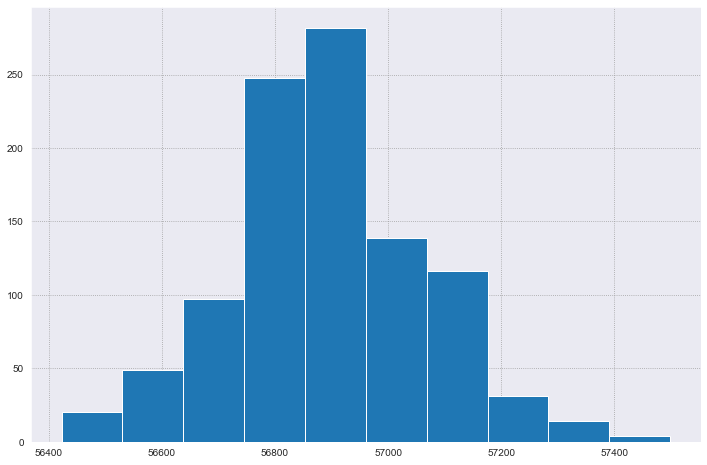

In [92]:
plt.figure(figsize=(12,8))
plt.hist(values)
plt.show()

## Регион №2

In [93]:
state = np.random.RandomState(35)
values = []

for i in range(1000):
    subsample = df2_test['profit'].sample(frac=0.75, replace=True, random_state=state)
    values.append(subsample.quantile(0.975))

values = pd.Series(values)
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)
 
print(lower)
print(upper)

53958.10533623559
54336.72551421637


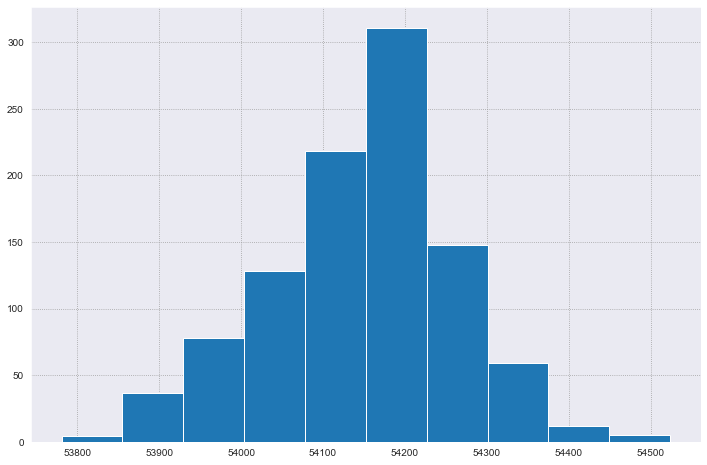

In [94]:
plt.figure(figsize=(12,8))
plt.hist(values)
plt.show()

## Регион №3

In [96]:
state = np.random.RandomState(35)
values = []

for i in range(1000):
    subsample = df3_test['profit'].sample(frac=0.75, replace=True, random_state=state)
    values.append(subsample.quantile(0.975))

values = pd.Series(values)
    
lower = values.quantile(0.05)
upper = values.quantile(0.95)
 
print(lower)
print(upper)

56352.19472034095
56874.16218459984


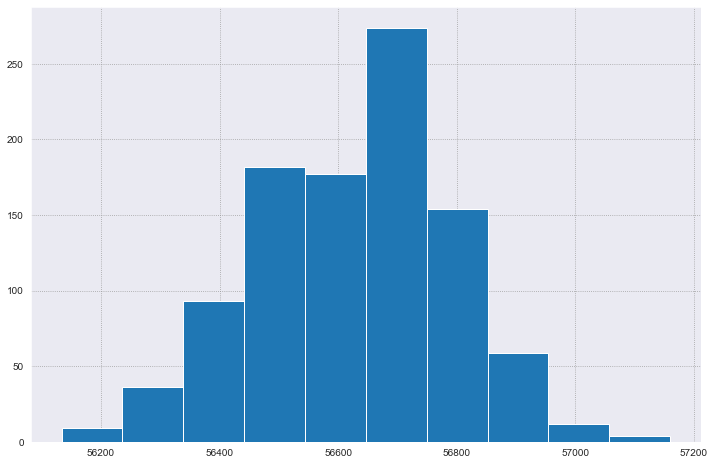

In [97]:
plt.figure(figsize=(12,8))
plt.hist(values)
plt.show()

Ни один регион не вгоняет нам в минус, однако судя по распределению прибыли со скважин, полученным по результатам бутстрепа и результатам RMSE ранее, стоит выбрать второй регион для разработки, так как на гистограммах видно мало мега аномальных а распределение кажется наиболее гладким и схожим с нормальным. Средняя прибыль при этом будет в районе 54200, что явно лучше, чем рисковать на среднюю прибыль 56700 (третий регион), полученную с помощью прогноза плохой моделью. Второй вариант улучшать модели, тюнить их гиперпараметры для других регионов, тогда может дело дойдет до выбора третьего, например. Но я не думаю, что удастся получить такое же хорошее качество (особенно на топ 200), как у текущей модели для второго региона.